# All of Annsel

This notebook tells you just about everything you need to use `annsel`. It's a good starting point to get a feel for the package.

:::{note}
:class: dropdown

You should be familiar with [`AnnData` ](https://anndata.readthedocs.io/en/latest/) beforehand.
:::

## Set up Data

In [1]:
import annsel as an

We will load a Leukemic bone marrow cytometry dataset :cite:p:`triana_single-cell_2021` You can view the dataset on [CellxGene](https://cellxgene.cziscience.com/e/b3a5a10f-b1cb-4e8e-abce-bf345448625b.cxg/).


In [2]:
adata = an.datasets.leukemic_bone_marrow_dataset()

Importing `annsel` will automatically register the `AnnData` accessors. You can access them with `anndata.AnnData.an`.

The accessor allows you to perform operations on `AnnData` objects with respect to columns and indices.


In addition, the following `Narwhals` inherited expressions are also available:


You express the following:
1. Observation columns: `an.obs_col()`
2. Variable columns: `an.var_col()`
3. Observation names: `an.obs_names()`
4. Variable names: `an.var_names()`
5. In the future we will be able to filter by the X matrix: `an.x()`


These can be combined with the following methods:
1. Filter: `an.filter()`

For now only `filter` is implemented. There are two others planned so far: `select` and `groupby`. If you have any other suggestions, let me know.


You'll find that there are many familiar expressions which you can use. View the supported [`Narwhals` `Expr`](https://narwhals-dev.github.io/narwhals/api-completeness/expr/) methods for a full list.

## Filter


Suppose we only want to select variables which are Protein Coding genes. We can use the `var_cols` callable to filter the `AnnData` object where `"feature_type"` is "`protein_coding"`.


In [3]:
adata.an.filter(
    an.var_col(["feature_type"]) == "protein_coding",
)

View of AnnData object with n_obs × n_vars = 31586 × 445
    obs: 'Cluster_ID', 'donor_id', 'Sample_Tag', 'Cell_label', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'tissue_ontology_term_id', 'Genotype', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'feature_is_filtered', 'Unnamed: 0', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'cell_type_ontology_term_id_colors', 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_bothumap', 'X_pca', 'X_projected', 'X_projectedmean', 'X_tsneni', '

:::{note}
:class: dropdown

This is equivalent to:
```python

adata[:, adata.var["feature_type"] == "protein_coding"]
```
:::

Or if we want multiple feature types, we can use the method [`is_in`](https://narwhals-dev.github.io/narwhals/api-reference/expr/#narwhals.Expr.is_in). We can also use set operations to combine multiple predicates into a single predicate.


In [4]:
adata.an.filter(
    an.var_col(["feature_type"]).is_in(["protein_coding", "lncRNA"])
    | an.var_col(["feature_name"]).is_in(["IGHD", "IGHM", "IGKC"])
)

View of AnnData object with n_obs × n_vars = 31586 × 455
    obs: 'Cluster_ID', 'donor_id', 'Sample_Tag', 'Cell_label', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'tissue_ontology_term_id', 'Genotype', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'feature_is_filtered', 'Unnamed: 0', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'cell_type_ontology_term_id_colors', 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_bothumap', 'X_pca', 'X_projected', 'X_projectedmean', 'X_tsneni', '

:::{note}
:class: dropdown

This is equivalent to:
```python

adata[
    :,
    adata.var["feature_type"].isin(["protein_coding", "lncRNA"])
    | adata.var["feature_name"].isin(["IGHD", "IGHM", "IGKC"]),
]
```
:::

Let's filter the dataset by the various cell labels using `obs_col`.



In [5]:
adata.an.filter(an.obs_col(["Cell_label"]) == "Lymphomyeloid prog")

View of AnnData object with n_obs × n_vars = 913 × 458
    obs: 'Cluster_ID', 'donor_id', 'Sample_Tag', 'Cell_label', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'tissue_ontology_term_id', 'Genotype', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'feature_is_filtered', 'Unnamed: 0', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'cell_type_ontology_term_id_colors', 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_bothumap', 'X_pca', 'X_projected', 'X_projectedmean', 'X_tsneni', 'X_

:::{note}
:class: dropdown

This is equivalent to:
```python

adata[adata.obs["Cell_label"] == "Lymphomyeloid prog", :]
```
:::

We can combine multiple predicates to filter by both obs and var.

In [6]:
adata.an.filter(
    an.obs_col(["Cell_label"]) == "Lymphomyeloid prog",
    an.var_col(["feature_type"]).is_in(["protein_coding"]),
    an.var_col(["vst.mean"]) >= 0.5,
    an.obs_col(["sex"]) == "male",
)

View of AnnData object with n_obs × n_vars = 235 × 168
    obs: 'Cluster_ID', 'donor_id', 'Sample_Tag', 'Cell_label', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'tissue_ontology_term_id', 'Genotype', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'feature_is_filtered', 'Unnamed: 0', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'cell_type_ontology_term_id_colors', 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_bothumap', 'X_pca', 'X_projected', 'X_projectedmean', 'X_tsneni', 'X_

:::{note}
:class: dropdown

This is equivalent to 

```python
adata[
    (adata.obs["Cell_label"] == "Lymphomyeloid prog") & (adata.obs["sex"] == "male"),
    (adata.var["feature_type"].isin(["protein_coding"])) & (adata.var["vst.mean"] >= 0.5),
]
```
:::


We can also filter by `var_names` and `obs_names`. We can also return a copy instead of a view of the original `AnnData` object.


In [7]:
adata.an.filter(an.var_names().str.starts_with("ENSG0000018"), an.obs_names().str.ends_with("1"), copy=True)

AnnData object with n_obs × n_vars = 4149 × 30
    obs: 'Cluster_ID', 'donor_id', 'Sample_Tag', 'Cell_label', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'tissue_ontology_term_id', 'Genotype', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'feature_is_filtered', 'Unnamed: 0', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'cell_type_ontology_term_id_colors', 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_bothumap', 'X_pca', 'X_projected', 'X_projectedmean', 'X_tsneni', 'X_umapni'

:::{note}
:class: dropdown

This is equivalent to 

```python
adata[adata.obs_names.str.endswith("1"), adata.var_names.str.startswith("ENSG0000018")]
```
:::


### Pipe


You can also use the `pipe` method to chain multiple operations together.


In [8]:
adata

AnnData object with n_obs × n_vars = 31586 × 458
    obs: 'Cluster_ID', 'donor_id', 'Sample_Tag', 'Cell_label', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'tissue_ontology_term_id', 'Genotype', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'feature_is_filtered', 'Unnamed: 0', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'cell_type_ontology_term_id_colors', 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_bothumap', 'X_pca', 'X_projected', 'X_projectedmean', 'X_tsneni', 'X_umapni

/Users/srivarra/Dev/annsel/.venv/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/Users/srivarra/Dev/annsel/.venv/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/Users/srivarra/Dev/annsel/.venv/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/Users/srivarra/Dev/annsel/.venv/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/Users/srivarra/Dev/annsel/.venv/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_

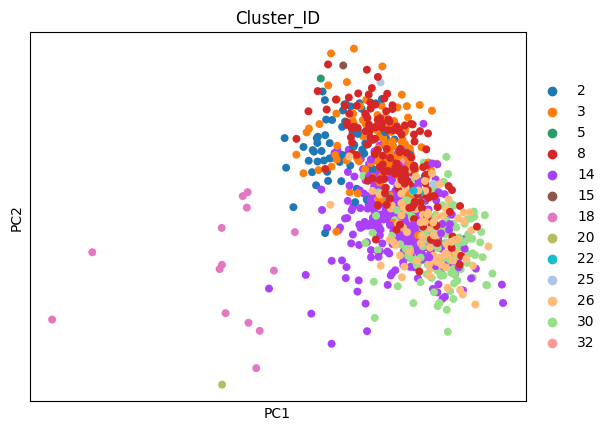

In [9]:
import scanpy as sc

adata.an.filter(
    an.obs_col(["Cell_label"]) == "Lymphomyeloid prog",
    an.var_col(["feature_type"]).is_in(["protein_coding"]),
    copy=True,
).an.pipe(sc.pl.pca, color=["Cluster_ID"])

In [12]:
adata.an.filter(an.x(["ENSG00000206560"]) >= 1)

View of AnnData object with n_obs × n_vars = 8241 × 458
    obs: 'Cluster_ID', 'donor_id', 'Sample_Tag', 'Cell_label', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'tissue_ontology_term_id', 'Genotype', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'feature_is_filtered', 'Unnamed: 0', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'cell_type_ontology_term_id_colors', 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_bothumap', 'X_pca', 'X_projected', 'X_projectedmean', 'X_tsneni', 'X